<a href="https://colab.research.google.com/github/Jefferson-marques/PJ2/blob/master/Analisando_os_Dados_do_Airbnb_Porto_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Porto, Portugal

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Porto, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

O melhor arquivo para ser importardo seria *o listings.csv.gz*, porque tem mais variaveis e devido a isso pode se ter correlações melhores, mas o *listings.csv* é mais simples e por este motivo, é o melhor a ser usado. 

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2019-11-28/visualisations/listings.csv")

## Análise dos Dados

**Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.**


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.14894,-8.66113,Entire home/apt,58,2,17,2018-09-28,0.21,1,210
1,42462,Large Penthouse in Vila Nova Gaia,185492,Gabriela,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.10739,-8.59430,Entire home/apt,50,4,39,2018-10-14,0.46,3,31
2,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,4,14,2019-09-07,0.26,3,0
3,70925,APARTMENT WITH THE BEST CITY VIEW,361205,Miguel,VILA NOVA DE GAIA,Santa Marinha e São Pedro da Afurada,41.13810,-8.61108,Entire home/apt,97,4,56,2019-10-17,0.56,2,349
4,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,4,8,2019-07-22,0.14,3,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [0]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entrada:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Variáveis:	 11656
Entrada:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* Como pode ser visto quase todos os valores estão presentes
* Além disso, *reviews_per_month*, *last_review* possuem apenas 13% de variaveis faltantes, monstrando ser um número baixo e com isso podendo trabalhar perfeitamente.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.133751
last_review                       0.133751
host_name                         0.003003
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, um histograma irá ser mostrado.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a286927f0>,
      dtype=object)

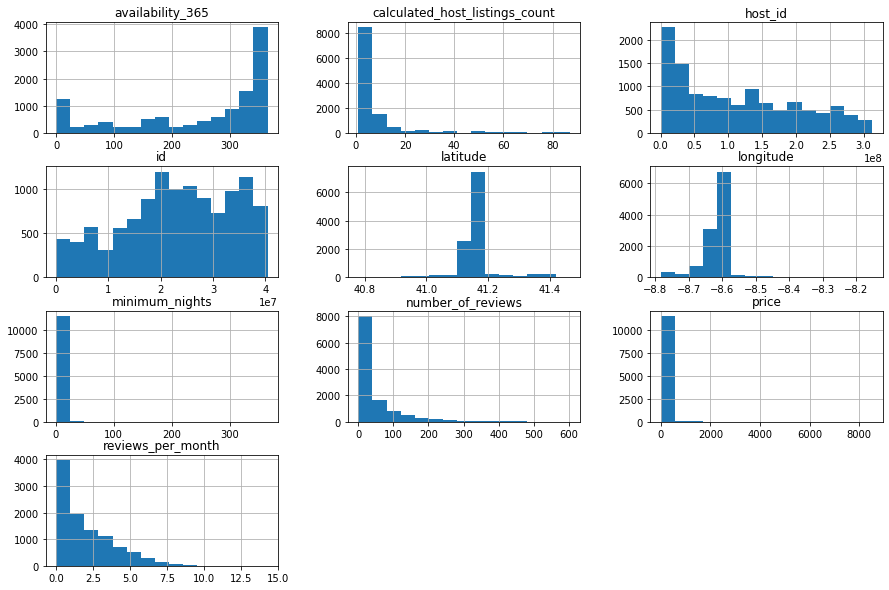

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))


### **Q4. Há outliers presentes?**



Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis *price* e *minimum_nights*.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
# ver o resumo estatísticos das variaveis númericas 
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,11656.000000,11656.000000
mean,81.684626,2.476750
std,164.528976,7.782002
min,0.000000,1.000000
25%,42.000000,1.000000
50%,60.000000,2.000000
75%,85.000000,2.000000
max,8509.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável *price* possui 75% do valor abaixo de 85, porém seu valor máximo é 8509

### Boxplot para price, segue abaixo:


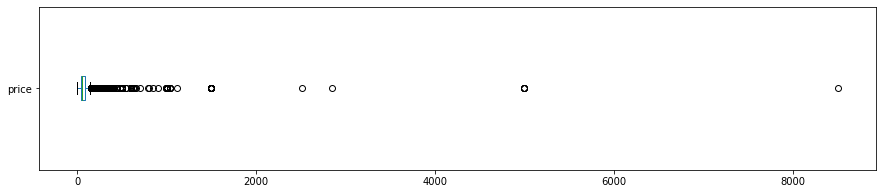


price: valores acima de 1000
35 entradas 
0.300275%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidades de valores acima de 1000 para price 
print("\nprice: valores acima de 1000")
print("{} entradas ".format(len(df[df.price > 1000])))
print("{:4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

### Boxplot para minimun_nights, segue abaixo:

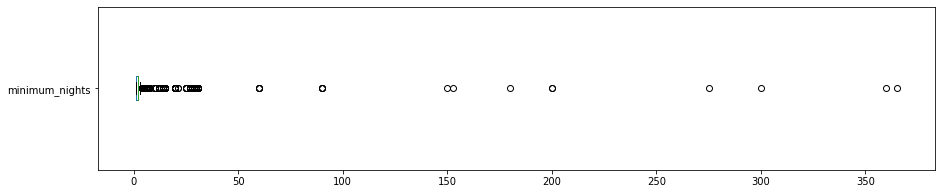


minimum_nights: valores de acima de 40
17entradas
0.145848%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidades de valores acima de 40 para minimum_nights
print("\nminimum_nights: valores de acima de 40")
print("{}entradas".format(len(df[df.minimum_nights > 40])))
print("{:4f}%".format((len(df[df.minimum_nights > 40]) / df.shape[0])*100))


### Histogramas sem outliers

Já que foi possível indentificar os *outliers* nas variáveis *price* e *minimum_nights*, agora o DataFrame ficará mais "real"

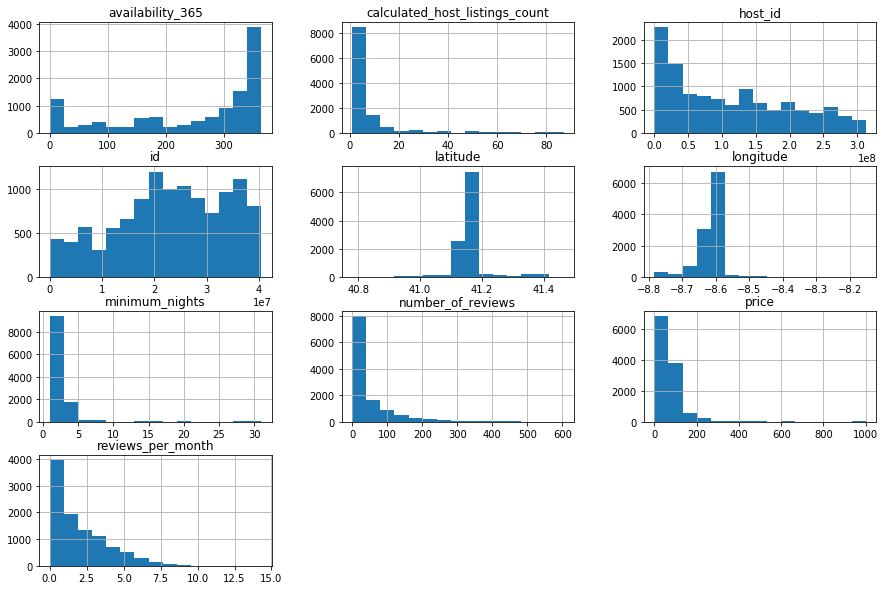

In [0]:
# remover os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 40].index, axis=0, inplace=True)

df_clean.hist(bins=15, figsize=(15, 10));

### **Q5. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price``
df_clean.price.mean()


75.27195174493752

Podemos ver que a média de preço de aluguel seria 75,30 a moeda do lugar em especifico, nesse caso Euro.

### **Q6. Qual a correlação existente entre as variáveis**

Agora uma busca de relação e/ou semelhança entre duas variáveis será feita.

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'reviews_per_month', 'minimum_nights', 'number_of_reviews','availability_365', 'calculated_host_listings_count']].corr()
display(corr)

# mostrar a matriz de correlação


,price,reviews_per_month,minimum_nights,number_of_reviews,availability_365,calculated_host_listings_count
price,1.000000,-0.108499,-0.032710,-0.115443,0.094074,0.009064
reviews_per_month,-0.108499,1.000000,-0.121245,0.654718,0.013151,-0.090023
minimum_nights,-0.032710,-0.121245,1.000000,-0.066013,-0.080440,-0.060402
number_of_reviews,-0.115443,0.654718,-0.066013,1.000000,0.000682,-0.085238
availability_365,0.094074,0.013151,-0.080440,0.000682,1.000000,0.148863
calculated_host_listings_count,0.009064,-0.090023,-0.060402,-0.085238,0.148863,1.000000


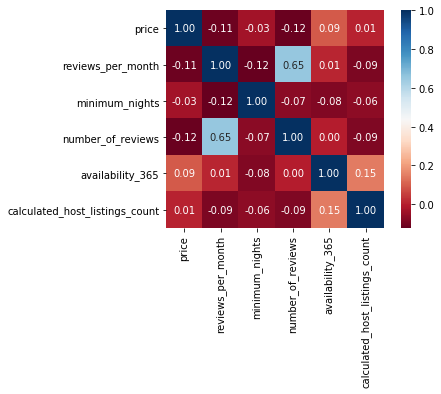

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True) ;

Como visto acima, não existe correlações significativas entre as variáveis em questão, mas precisa ser lembrado que há poucas variáveis e que os dados são simplicados, como explicado no **começo** desse artigo.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método *value_counts().italicized text*

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8950
Private room       2171
Hotel room          346
Shared room         138
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.771219
Private room       0.187075
Hotel room         0.029815
Shared room        0.011891
Name: room_type, dtype: float64

Como pode ser visto quase 80% dos alugueis são feitos para casas/apartamentos inteiros e ,aproximadamente, 1,5% dos alugueis são em quartos compartilhados.

### **Q8. Qual a localidade mais cara do dataset?**



Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Negrelos (São Tomé)    597.333333
Folgosa                255.000000
Recarei                250.000000
Guilhabreu             227.000000
Água Longa             222.500000
Melres e Medas         205.800000
São Miguel do Mato     200.000000
Santa Eulália          197.500000
Alvarenga              192.857143
São Paio de Oleiros    190.000000
Name: price, dtype: float64

Lembrando que existe a representabilidade que significa a quantidade de imóveis para com o bairro em questão, por exemplo se houver poucos imóveis em um bairro especifico, além disso se existir valores como 40, 500, 1000, 55, a média pode ser não-representativa. Então o melhor é conhecer os locais que estão na pesquisa e caso aconteça algum tipo de discrepancia, o melhor é fazer ver quantas entradas existe. Vou mostrar um exemplo com o bairro **São Miguel do Mato**

In [0]:
# ver quantidade de imóveis no São Miguel do Mato
print(df[df.neighbourhood == "São Miguel do Mato"].shape)

(1, 16)


No exemplo, só existe uma entrada então só existe um valor, vamos visualiza-lo.

In [0]:
# ver a entrada do São Miguel do Mato
df[df.neighbourhood == "São Miguel do Mato"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3128,16943451,Lomba da Pereira-Casa de Campo c/ piscina AL4...,113254482,Manuel,AROUCA,São Miguel do Mato,40.96894,-8.41143,Entire home/apt,200,2,26,2019-08-25,0.81,1,0


Isso mostra exatamente os problemas que podem ocorrer, então precisa ter muito cuidado com os dados que estão sendo processados. Os dados desse artigo são mais simples e mais simplificados então com dados mais robustos isso pode mudar um pouco.

## **Como saber cada ponto onde os imoveis estão localizados ?**

* Como sabemos a latitude e a logintude, conseguimos saber exatamente onde cada imóvel se localiza.
* Com isso usaremos x = longitute e y = latitude
* Além disso, pode ser visto valores conforme a linha ao lado do mapa. 

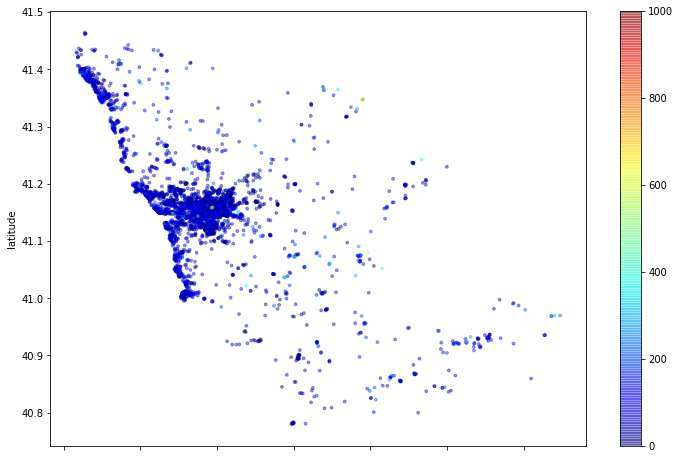

In [0]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12, 8)) ;

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()



2.242654028436019

Pode ser visto que a média são duas noites, o que mostra, talvez, um fim de semana(Sábado e domingo)

## Conclusões




* Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

* Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

* Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.